In [3]:
library("ggplot2")

In [74]:
library("leaflet")

In [75]:
library("viridis")

Loading required package: viridisLite


In [76]:
library("sf")

Linking to GEOS 3.6.2, GDAL 2.3.0, proj.4 5.0.1


In [28]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ dplyr   0.7.6
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [77]:
z3shp <- st_read("zip3/zip3.shp")

Reading layer `zip3' from data source `/home/maulikrk/zip3/zip3.shp' using driver `ESRI Shapefile'
Simple feature collection with 892 features and 5 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -179.1473 ymin: 17.67424 xmax: -64.56502 ymax: 71.39048
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


In [17]:
head(zing_data)

ZIP3,STATE,POP2012,POP12_SQMI,SQMI,drug,drug_name,year,geometry
1,US,-99,-99,251853.4,670,Morphine,2011,MULTIPOLYGON (((-80.44345 2...
2,US,-99,-99,15531.1,105,Morphine,2011,MULTIPOLYGON (((-97.31581 2...
3,PR,-99,-99,1695.6,369,Morphine,2011,MULTIPOLYGON (((-66.97266 1...
4,PR,-99,-99,1507.1,328,Morphine,2011,MULTIPOLYGON (((-66.53115 1...
5,VI,-99,-99,134.4,309,Morphine,2011,MULTIPOLYGON (((-64.7619 17...
6,PR,-99,-99,243.7,417,Morphine,2011,MULTIPOLYGON (((-66.01582 1...


In [20]:
head(z3shp)

ZIP3,STATE,POP2012,POP12_SQMI,SQMI,geometry
000,US,-99,-99,251853.4,MULTIPOLYGON (((-80.44345 2...
001,US,-99,-99,15531.1,MULTIPOLYGON (((-97.31581 2...
006,PR,-99,-99,1695.6,MULTIPOLYGON (((-66.97266 1...
007,PR,-99,-99,1507.1,MULTIPOLYGON (((-66.53115 1...
008,VI,-99,-99,134.4,MULTIPOLYGON (((-64.7619 17...
009,PR,-99,-99,243.7,MULTIPOLYGON (((-66.01582 1...


In [78]:
ap <- read.table("zip_code_count.tsv", sep="\t", header = T)

In [79]:
head(ap)

Zip_code,opioid,number_occurrences
152,Fentanyl,143252
452,Oxycodone,133084
71,Oxycodone,132565
70,Oxycodone,124923
80,Fentanyl,124281
275,Fentanyl,120388


In [80]:
z <- z3shp %>% mutate(ZIP3 = as.integer(ZIP3))

In [81]:
real_data <- merge(ap, z, by.x = "Zip_code", by.y = "ZIP3")

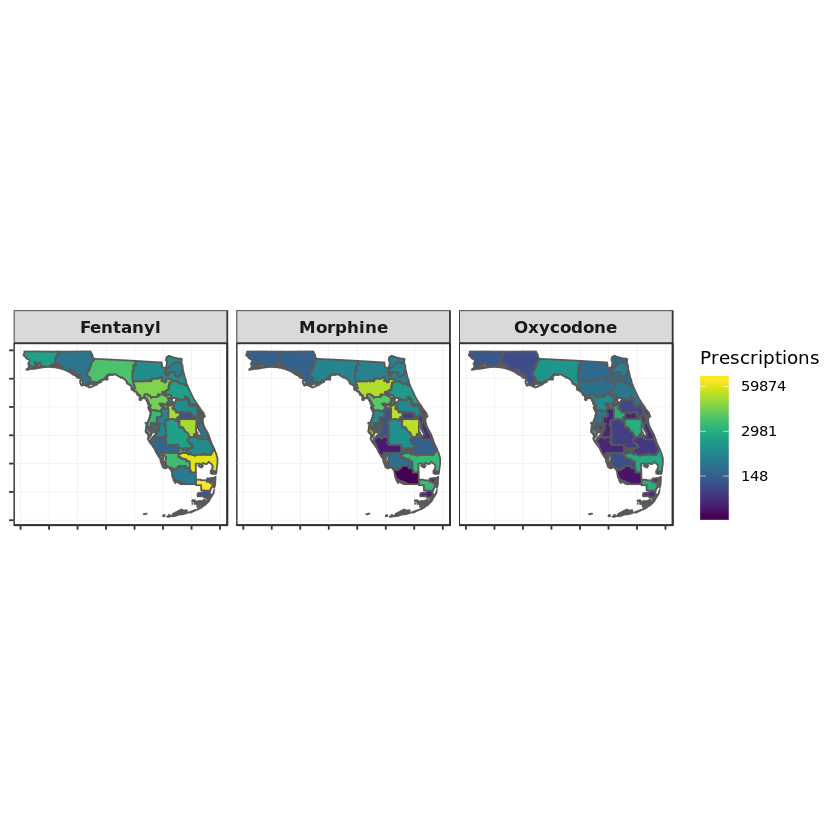

In [88]:
real_data %>%
    filter(STATE == "FL", opioid %in% c("Fentanyl", "Morphine", "Oxycodone")) %>% 
    ggplot(aes(fill = number_occurrences)) +
    facet_wrap(~opioid) + geom_sf() + theme_bw() +
    theme(axis.text.x=element_blank(), axis.text.y=element_blank(), 
          strip.text = element_text(size=10, family = "Tahoma", face = "bold"), 
          panel.background = element_rect(colour = "black")) +
    coord_sf(crs = 26915) + scale_fill_viridis(trans = "log", 
                                               labels=trans_format("identity", function(x) round(x,0)), 
                                                                   name="Prescriptions") 

In [1]:
comb <- read.table("comb1.tsv", sep="\t", header=T, colClasses=c('factor', 'factor', 'factor', 'numeric', 'factor'))

In [31]:
head(comb)

Zip_code,Admit_year,opioid,number_occurrences,region_name
70,2009,Fentanyl,18179,"Newark, NJ"
70,2010,Fentanyl,23337,"Newark, NJ"
70,2011,Fentanyl,22840,"Newark, NJ"
70,2012,Fentanyl,13125,"Newark, NJ"
70,2013,Fentanyl,5904,"Newark, NJ"
70,2014,Fentanyl,1624,"Newark, NJ"


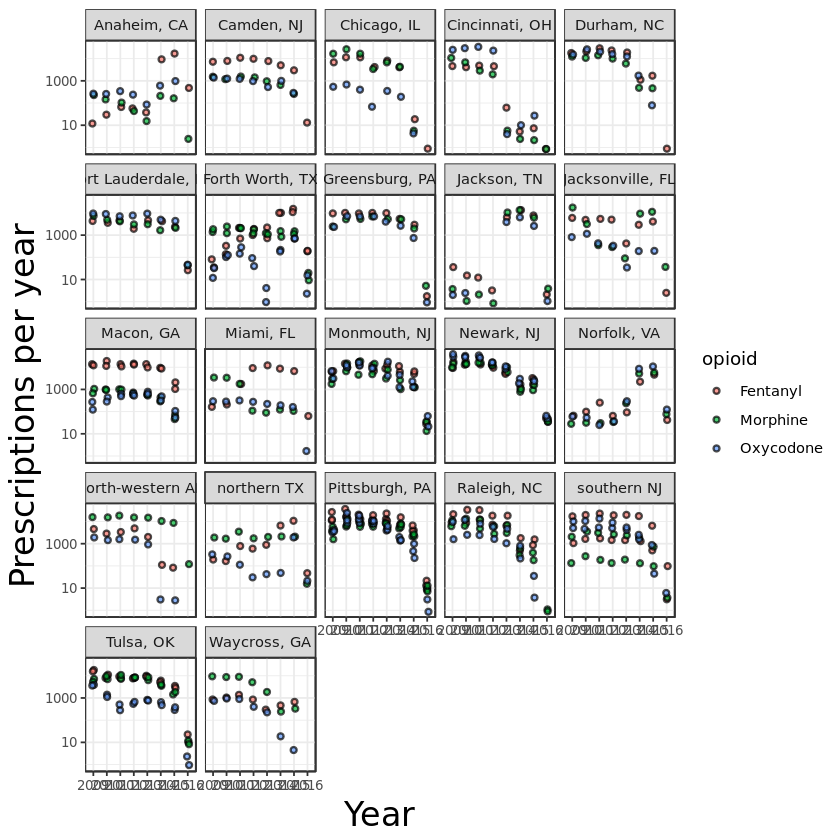

In [23]:
ggplot() + scale_x_discrete(name="Year") + scale_y_log10(name="Prescriptions per year") +
  geom_point(data = comb, aes(x=Admit_year, y=number_occurrences, fill=opioid), size=1, 
             position = position_jitter(w = 0.1, h = 0.1), 
             na.rm = TRUE, colour = "black", stroke = 1, pch=21, alpha = 0.7) +
facet_wrap(~ region_name) +
  #geom_text(data=ref_stats, aes(x=ui, y=api, label = index), size=4, hjust = 0, nudge_x = 0.01) +
  #geom_label(data = sel_ref_stats, aes(x=ui, y=api, label=label), size=7, hjust = 0, nudge_x = 0.01) +
  theme_bw()+
  theme(axis.text.x = element_text(size = 8),
        axis.text.y = element_text(size = 8),
        axis.title.y = element_text(size = 20, angle = 90), 
        axis.title.x = element_text(size = 20, angle = 00),
        panel.background = element_rect(colour = "black"))

In [40]:
comb <- read.table("comb1_few.tsv", sep="\t", header=T, colClasses=c('factor', 'factor', 'factor', 'numeric', 'factor'))

In [56]:
library(grid)

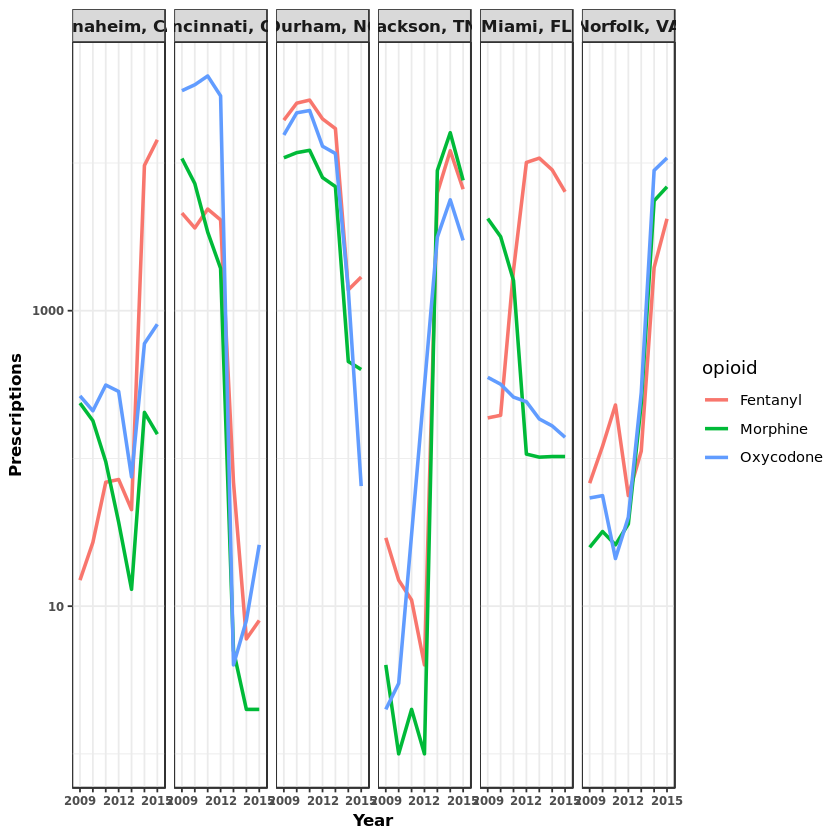

In [73]:
comb %>%
    filter(Zip_code %in% c("928", "452", "383", "331", "236", "277")) %>% 
    ggplot(aes(x=Admit_year, y=number_occurrences, color=opioid, group = opioid)) + 
    scale_x_discrete(name="Year", labels=c("2009", "", "", "2012", "", "", "2015")) + scale_y_log10(name="Prescriptions") +
    geom_line(size=1) +
    facet_wrap(~ region_name, ncol=6, nrow=1) +
      #geom_text(data=ref_stats, aes(x=ui, y=api, label = index), size=4, hjust = 0, nudge_x = 0.01) +
      #geom_label(data = sel_ref_stats, aes(x=ui, y=api, label=label), size=7, hjust = 0, nudge_x = 0.01) +
      theme_bw()+
      theme(axis.text.x = element_text(size = 7, family = "Tahoma", face = "bold"),
            axis.text.y = element_text(size = 7, family = "Tahoma", face = "bold"),
            strip.text = element_text(size=10, family = "Tahoma", face = "bold"),
            axis.title.y = element_text(size = 10, angle = 90, family = "Tahoma", face = "bold"), 
            axis.title.x = element_text(size = 10, angle = 00, family = "Tahoma", face = "bold"),
            panel.background = element_rect(colour = "black"))

ggsave("plot.png", width = 10, height = 2)

In [115]:
mcount <- read.table("_mcount.tsv", sep="\t", header=T)
head(mcount)

X0,X1
Morphine,9706
Fentanyl,6721
Hydromorphone,6252
Oxycodone,4111
Hydrocodone,4000
Codeine,3914


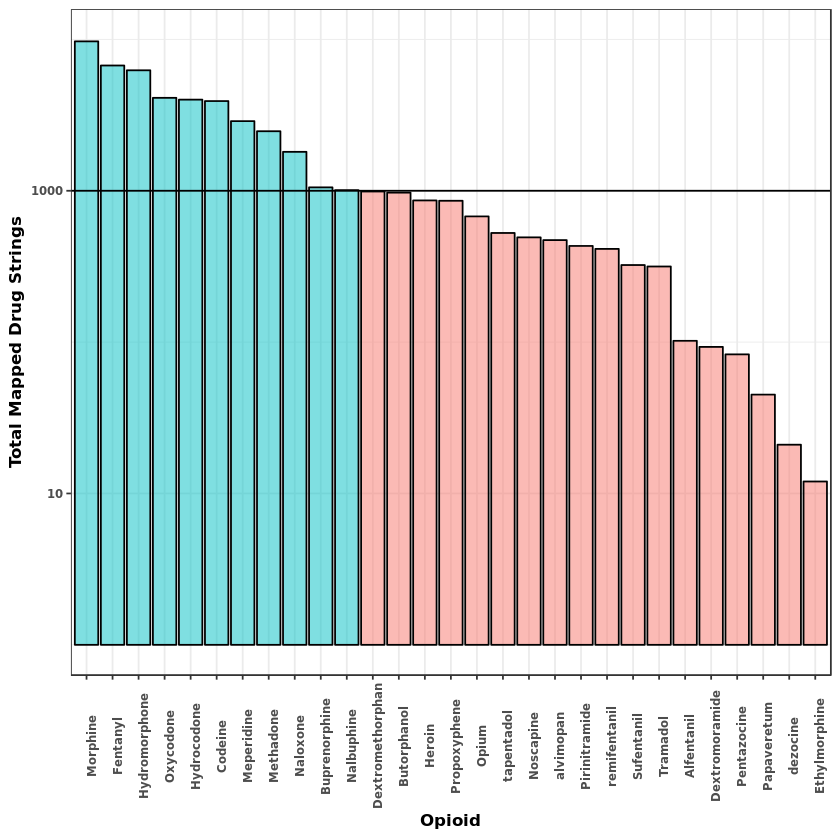

In [135]:
#"Acetaminophen / Codeine"@en - 817579
#"Codeine / Ibuprofen"@en - 710303
#"Ibuprofen / Oxycodone"@en - 484259
#"Acetaminophen / Tramadol"@en - 352362
#"Naltrexone / Oxycodone"@en - 1806700
#"Naloxone / Oxycodone"@en - 1545902
#"Aspirin / Codeine"@en - 135095

mcount %>%
    filter(!X0 %in% c("Acetaminophen / Codeine", "Codeine / Ibuprofen", "Ibuprofen / Oxycodone", 
                      "Acetaminophen / Tramadol", "Naltrexone / Oxycodone", "Naloxone / Oxycodone", 
                      "Aspirin / Codeine", "Methylnaltrexone bromide")) %>% 
    ggplot(aes(reorder(X0, -X1), X1)) + 
    scale_x_discrete(name="Opioid") + scale_y_log10(name="Total Mapped Drug Strings", limits = c(1,1e4)) +
    geom_bar(stat = 'identity', aes(fill = X1>1000), color = "black", alpha = 0.5) +
    geom_hline(yintercept =  1000) + scale_fill_discrete(guide = 'none') + 
      theme_bw()+
      theme(axis.text.x = element_text(size = 7, family = "Tahoma", face = "bold", angle = 90),
            axis.text.y = element_text(size = 7, family = "Tahoma", face = "bold"),
            axis.title.y = element_text(size = 10, angle = 90, family = "Tahoma", face = "bold"), 
            axis.title.x = element_text(size = 10, angle = 00, family = "Tahoma", face = "bold"),)

ggsave("plot1.png", width = 4, height = 4)